Nome: Felipe Faustino Brito

Matrícula: 2021007366

In [2]:
from scipy import signal
import control as ctl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

### 1) Mostrar o gráfico do sinal anexo no tempo (tempo x amplitude) bem como os gráficos de seu espectro.


In [8]:
def plot_signal(signal: np.ndarray, time: np.ndarray, frequency: float, limite=800):
    """
        Plota um sinal no domínio do tempo e sua resposta em frequência.
        
        Params:
            signal (np.ndarray): O sinal a ser plotado.
            time (np.ndarray): O array de tempos correspondente ao sinal.
            frequency (float): A frequência de amostragem do sinal (em Hz).
            limite (float, opcional): O limite superior do eixo x da resposta em frequência.
    """
    # Plotar o sinal no domínio do tempo
    plt.figure(figsize=(10, 4))
    plt.plot(time, signal)
    plt.title('Sinal')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

    # Resposta em frequência (FFT)
    frequencia_fft = np.fft.fftfreq(len(signal), 1/frequency)
    espectro_fft = np.fft.fft(signal)

    # Plotar a magnitude da resposta em frequência
    plt.figure(figsize=(10, 4))
    plt.plot(frequencia_fft[:len(frequencia_fft)//2], np.abs(espectro_fft)[:len(espectro_fft)//2])
    plt.title('Resposta em frequência do sinal')
    plt.xlabel('Frequência [Hz]')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(0, limite)
    plt.show()

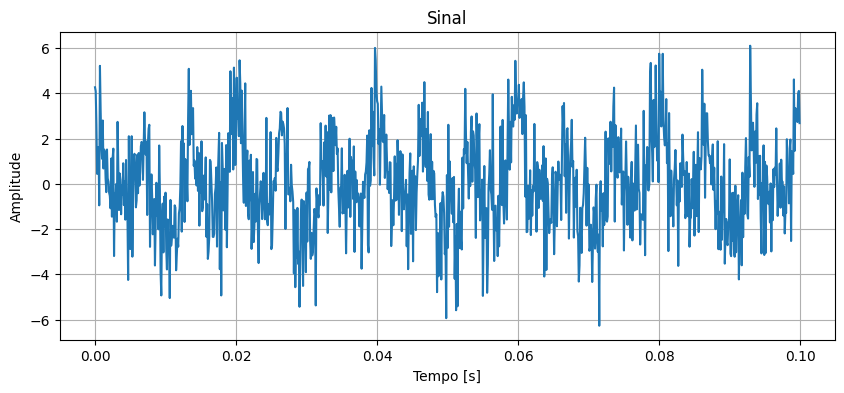

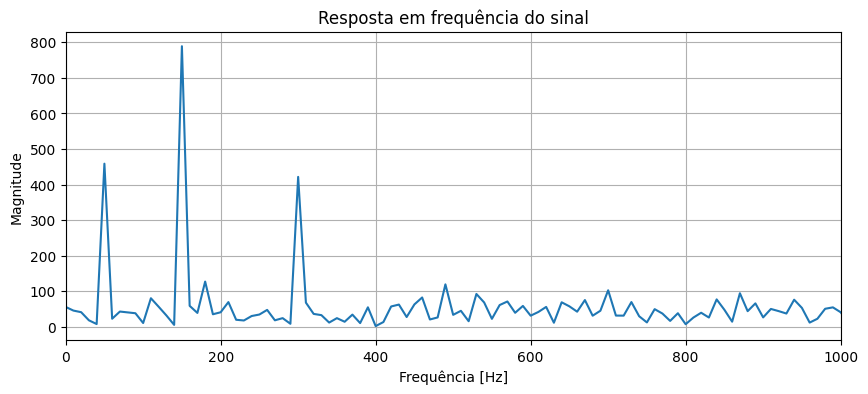

In [10]:
import os
from pathlib import Path


fs = 10000
Ts = 1/fs
s = 0

signal_path = Path(os.getcwd()) / 'sinal.npy'
with open(signal_path,'rb') as arq:
    s = np.load(arq)

time = np.arange(len(s)) / fs
plot_signal(signal=s, time=time, frequency=fs, limite=1000)

In [27]:
def significant_amplitudes_and_frequencies(signal) -> tuple:
    """
        Encontra as amplitudes e frequências significativas do sinal.
        
        Returns:
            tuple: As amplitudes e frequências significativas.
    """
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(len(signal), 1/fs)

    # Apenas usamos a metade positiva do espectro (frequências positivas)
    half_n = len(signal) // 2
    fft_vals = np.abs(fft_vals[:half_n])  # Magnitude das componentes de frequência
    fft_freqs = fft_freqs[:half_n]

    # Definindo o limiar de ruído
    noise_threshold = np.mean(fft_vals) + 2 * np.std(fft_vals)  # Exemplo de limiar de ruído

    # Filtrando as componentes significativas
    significant_freqs = fft_freqs[fft_vals > noise_threshold]
    significant_amplitudes = fft_vals[fft_vals > noise_threshold]

    return significant_amplitudes, significant_freqs



In [28]:

significant_amplitudes, significant_freqs = significant_amplitudes_and_frequencies(s)

print("Componentes Signifactivas:")
# Exibindo as frequências e amplitudes significativas
for freq, amplitude in zip(significant_freqs, significant_amplitudes):
    print(f"Frequência: {freq:.2f} Hz - Amplitude: {amplitude:.2f}")

Componentes Signifactivas:
Frequência: 50.00 Hz - Amplitude: 458.71
Frequência: 150.00 Hz - Amplitude: 788.82
Frequência: 300.00 Hz - Amplitude: 421.59


### 2) Construir sua própria função Python para executar a convolução usando ou o ponto de vista da entrada ou o ponto de vista da saída. A função deve receber apenas duas variáveis com os vetores que serão usados na convolução e deve devolver somente o vetor com o resultado.


In [16]:
def input_convolve(entrada: list, impulso: list) -> list:
    """
        Convolução de dois sinais de entrada.
        
        Params:
            entrada (list): Sinal de entrada 1.
            impulso (list): Sinal de entrada 2.
        
        Returns:
            list: Sinal resultante da convolução.
    """
    n = len(entrada)
    m = len(impulso)
    resultado = [0] * (n + m - 1)  # Vetor de saída com tamanho n + m - 1

    # Executa a convolução
    for i in range(n):
        for j in range(m):
            resultado[i + j] += entrada[i] * impulso[j]
    
    return resultado

In [ ]:
entrada = [1,3,7,5]
impulso = [0,6,4,2]
resultado = input_convolve(entrada, impulso)
print("Resultado da Convolução de entrada:", resultado)

Resultado da Convolução: [0, 6, 22, 56, 64, 34, 10]


### 3) Construir sua própria função Python para a convolução na versão para execução em tempo real. A função deve receber apenas duas variáveis com os vetores que serão usados na convolução e deve devolver somente o vetor com o resultado.

In [23]:
def real_time_convolve(entrada: list, impulso: list) -> list:
    M = len(impulso)  
    x_aux = [0] * (M - 1)  
    saida = []  

    # Itera sobre cada amostra de entrada
    for x in entrada:
        y = impulso[0] * x  

        for k in range(1, M):
            y += impulso[k] * x_aux[M - k - 1]

        saida.append(y)

        for k in range(M - 2):
            x_aux[k] = x_aux[k + 1]
        x_aux[M - 2] = x
    return saida




In [24]:
entrada = [1,3,7,5]
impulso = [0,6,4,2]
resultado = real_time_convolve(entrada, impulso)
print("Resultado da Convolução em tempo real:", resultado)

Resultado da Convolução em tempo real: [0, 6, 22, 56]


### 4) Executar a filtragem do sinal anexo com filtro Moving Average na forma FIR para reduzir o ruído aleatório ao máximo, sem que afete significativamente (tolerância de ±30%) as amplitudes das componentes que devem permanecer no sinal. Fazer a execução usando uma das funções Python desenvolvidas nos exercícios anteriores

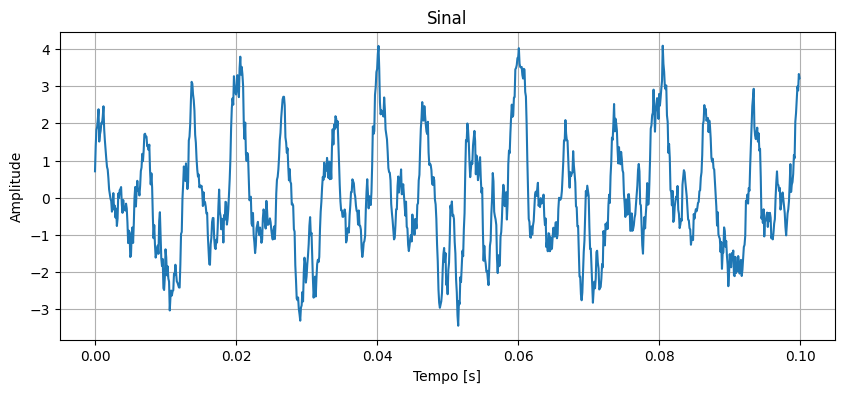

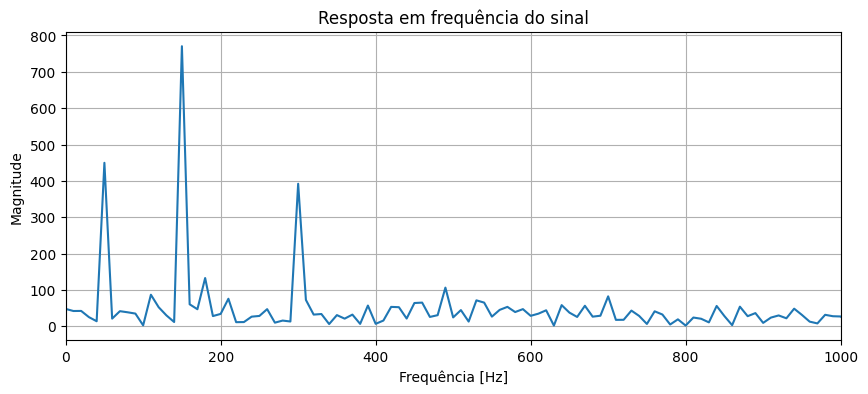

In [59]:
window_size = 6  # Escolhendo o tamanho da janela (30 amostras) Kernel
h = np.ones(window_size) / window_size  # Definindo o impulso do filtro

sinal_filtrado = real_time_convolve(entrada=s, impulso=h)

sinal_filtrado = np.array(sinal_filtrado)

plot_signal(signal=sinal_filtrado, time=time, frequency=fs, limite=1000)

In [60]:
significant_amplitudes, significant_freqs = significant_amplitudes_and_frequencies(sinal_filtrado)

print("Componentes Signifactivas do sinal Filtrado:")
# Exibindo as frequências e amplitudes significativas
for freq, amplitude in zip(significant_freqs, significant_amplitudes):
    print(f"Frequência: {freq:.2f} Hz - Amplitude: {amplitude:.2f}")

Componentes Signifactivas do sinal Filtrado:
Frequência: 50.00 Hz - Amplitude: 449.70
Frequência: 150.00 Hz - Amplitude: 770.44
Frequência: 180.00 Hz - Amplitude: 132.70
Frequência: 300.00 Hz - Amplitude: 392.08
Frequência: 490.00 Hz - Amplitude: 106.32
